# ***TomatoVitality***

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
COLOR_CHANNELS = 3

In [ ]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Tomato Info/Images",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9324 files belonging to 10 classes.


In [ ]:
class_name = df.class_names
class_name

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites_Two_spotted_spider_mite',
 'Target_Spot',
 'Tomato_YellowLeaf__Curl_Virus',
 'healthy',
 'mosaic_virus']

In [ ]:
n_classes = len(class_name)
n_classes

10

In [ ]:
len(df)

292

In [ ]:
for image_batch, label_batch in df.take(1):
  print(image_batch[1].shape)
  print(label_batch[1].numpy())

(256, 256, 3)
4


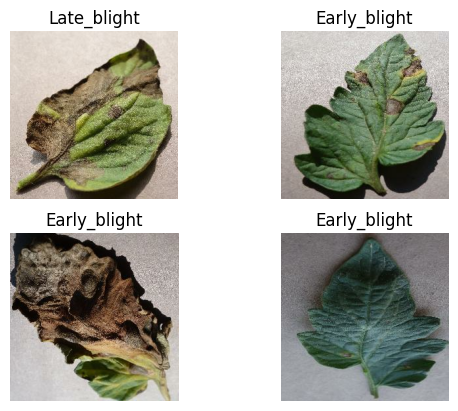

In [ ]:
for image_batch, label_batch in df.take(1):
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")

In [ ]:
def get_train_val_test(df, train_split=0.8, val_split = 0.1, shuffle=True, shuffle_size=10000):
  if shuffle:
    df = df.shuffle(shuffle, seed=10)
    train_size = int(len(df)*train_split)
    train_data = df.take(train_size)

    test_data = df.skip(train_size)
    val_size = int(len(df)*val_split)

    val_data =test_data.take(val_size)

    test_data = test_data.skip(val_size)

    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = get_train_val_test(df)

In [ ]:
len(train_data), len(val_data), len(test_data)

(233, 29, 30)

In [ ]:
train_data = train_data.cache().shuffle(7500).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(7500).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(7500).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
len(train_data), len(val_data), len(test_data)

(233, 29, 30)

In [1]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

NameError: name 'tf' is not defined

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, COLOR_CHANNELS)


model = models.Sequential ([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])


model.build(input_shape = input_shape)


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor= "val_accuracy", patience=10, restore_best_weights = True)

In [ ]:
history = model.fit(
                                train_data,
                                batch_size=BATCH_SIZE,
                                epochs= 50,
                                verbose=1,
                                validation_data = val_data,
                                callbacks=[early_stopping])

Epoch 1/50
233/233 [==============================] - 1543s 864ms/step - loss: 1.9934 - accuracy: 0.2589 - val_loss: 1.6518 - val_accuracy: 0.4030
Epoch 2/50
233/233 [==============================] - 20s 85ms/step - loss: 1.5411 - accuracy: 0.4493 - val_loss: 1.6404 - val_accuracy: 0.4774
Epoch 3/50
233/233 [==============================] - 20s 86ms/step - loss: 1.2073 - accuracy: 0.5667 - val_loss: 1.0117 - val_accuracy: 0.6422
Epoch 4/50
233/233 [==============================] - 20s 87ms/step - loss: 0.9766 - accuracy: 0.6505 - val_loss: 1.0541 - val_accuracy: 0.6218
Epoch 5/50
233/233 [==============================] - 20s 86ms/step - loss: 0.7816 - accuracy: 0.7233 - val_loss: 0.6934 - val_accuracy: 0.7446
Epoch 6/50
233/233 [==============================] - 20s 86ms/step - loss: 0.6488 - accuracy: 0.7697 - val_loss: 0.8097 - val_accuracy: 0.6961
Epoch 7/50
233/233 [==============================] - 20s 86ms/step - loss: 0.5529 - accuracy: 0.8039 - val_loss: 0.5360 - val_accura

In [ ]:
score = model.evaluate(test_data)

30/30 [==============================] - 200s 47ms/step - loss: 0.1545 - accuracy: 0.9521


In [ ]:
score

[0.1544853150844574, 0.9521276354789734]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 233}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation loss')

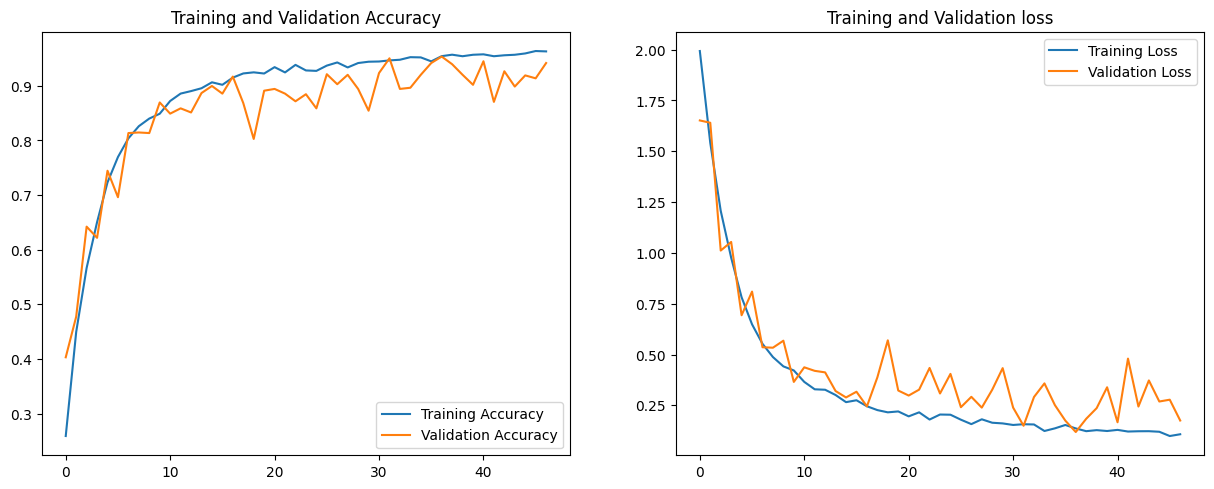

In [ ]:
plt.figure(figsize = (15, 5.5))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label = "Training Accuracy")
plt.plot(range(len(val_acc)), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label = "Training Loss")
plt.plot(range(len(val_loss)), val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation loss")

Image to predict
True label:  Early_blight
1/1 [==============================] - 0s 41ms/step
Predicted label:  Early_blight


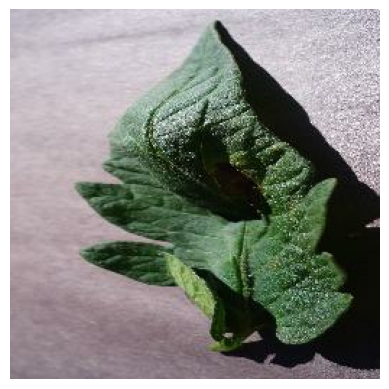

In [ ]:
for images_batch, labels_batch in test_data.take(1):

  first_image = images_batch[1].numpy().astype('uint8')
  first_label = class_name[label_batch[1].numpy()]

  print("Image to predict")
  plt.imshow(first_image)
  plt.axis("off")
  print("True label: " , first_label)

  batch_prediction = model.predict(images_batch)
  print("Predicted label: " , class_name[np.argmax(batch_prediction[1])])

In [ ]:
def predict(model, img):

  image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  image_array = tf.expand_dims(image_array, 0) ## create a batch

  prediction = model.predict(image_array)

  predicted_class = class_name[np.argmax(prediction[0])]
  confidence = round(100* (np.max(prediction[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


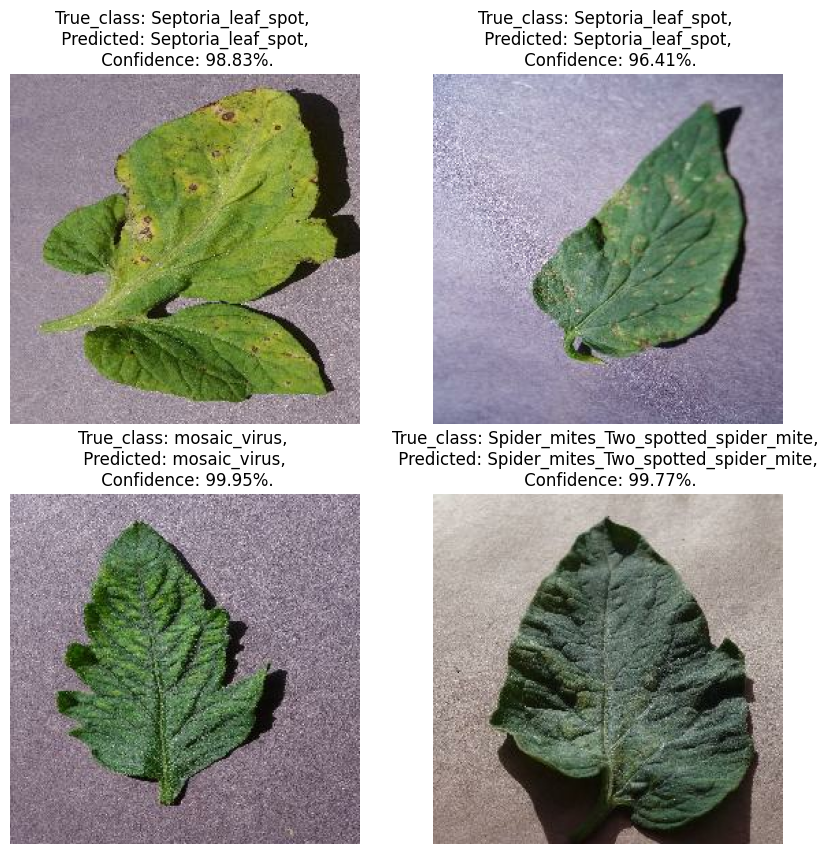

In [ ]:
plt.figure(figsize = (10, 10))

for images, label in test_data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    predicted_class, confidence = predict(model, images[i])
    True_class = class_name[label[i]]

    plt.title(f"True_class: {True_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%.")

In [ ]:
import os

model_version = max([int(i) for i in os.listdir('/content/drive/MyDrive/Tomato Info/models') +[0]]) + 1
print(model_version)
model.save(f"/content/drive/MyDrive/Tomato Info/models/{model_version}")

1
